In [1]:
import pandas as pd

In [2]:
Fake_News_Data_1 = pd.read_csv('Fake_News_Data_1.csv')
Fake_News_Data_2 = pd.read_csv('Fake_News_Data_2.csv')
Fake_News_Data_3 = pd.read_csv('Fake_News_Data_3.csv')
Fake_News_Data_4 = pd.read_csv('Fake_News_Data_4.csv')
Fake_News_Data_5 = pd.read_csv('Fake_News_Data_5.csv')
Fake_News_Data_6 = pd.read_csv('Fake_News_Data_6.csv')
Fake_News_Data_7 = pd.read_csv('Fake_News_Data_7.csv')
Fake_News_Data_8 = pd.read_csv('Fake_News_Data_8.csv')
Fake_News_Data_9 = pd.read_csv('Fake_News_Data_9.csv')
Fake_News_Data_10 = pd.read_csv('Fake_News_Data_10.csv')
Fake_News_Data_11 = pd.read_csv('Fake_News_Data_11.csv')
Fake_News_Data_12 = pd.read_csv('Fake_News_Data_12.csv')
Fake_News_Data_13 = pd.read_csv('Fake_News_Data_13.csv')
Fake_News_Data_14 = pd.read_csv('Fake_News_Data_14.csv')

In [3]:
Fake_News_Data = pd.concat([Fake_News_Data_1, Fake_News_Data_2, Fake_News_Data_3, Fake_News_Data_4, Fake_News_Data_5, Fake_News_Data_6, Fake_News_Data_7, Fake_News_Data_8, Fake_News_Data_9, Fake_News_Data_10, Fake_News_Data_11, Fake_News_Data_12, Fake_News_Data_13, Fake_News_Data_14])

In [4]:
Fake_News_Data = Fake_News_Data.iloc[ : , 1: ]

In [5]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [6]:
Fake_News_Data = Fake_News_Data.rename(columns={'label': 'fake'})

In [7]:
Fake_News_Data['fake'] = Fake_News_Data['fake'].astype('category')

Dataset contains three columns: Title (about the text news heading); Text (about the news content); and fake (0 = yes and 1 = no)

In [8]:
Fake_News_Data.head()

,title,text,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
Fake_News_Data.describe(include='all')

,title,text,fake
count,66622,67098,67133
unique,58583,58875,2
top,Factbox: Trump fills top jobs for his administ...,,1
freq,13,683,34568


In [10]:
Fake_News_Data.isnull().sum()

title    511
text      35
fake       0
dtype: int64

In [11]:
Fake_News_Data = Fake_News_Data.dropna(subset=['text'])

In [12]:
Fake_News_Data.isnull().sum()

title    511
text       0
fake       0
dtype: int64

In [13]:
## Alternativa mucho mas costosa computacionalmente

# for i in range(0, len(Fake_News_Data)):

   #  if Fake_News_Data['text'].isnull()[i] == True :

   #     Fake_News_Data.drop([i], axis=0)

In [14]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [15]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

In [16]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 0 , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 1 , :] ) / len(Fake_News_Data)

In [17]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if Fake_News_Data['fake' == 0][i] :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

KeyError: False

[Text(0.5, 0, 'Fakes'), Text(0, 0.5, 'proportion')]

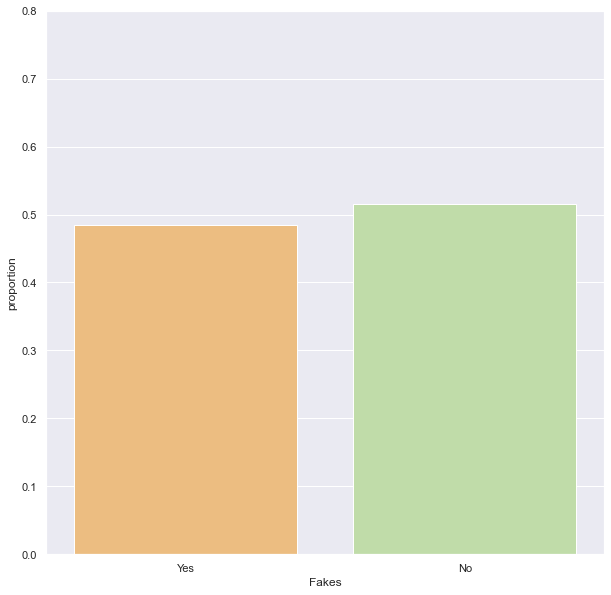

In [ ]:
p1 = sns.barplot(x='fake', y='proportion_Fakes', data=Fake_News_Data, palette="Spectral") 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Yes', 'No'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')

In [ ]:
[prop_Fake_yes , prop_Fake_no]

[0.48508185244216706, 0.5149181475578329]

In [ ]:
Fake_News_Data['word_count'] = Fake_News_Data['text'].str.split().str.len()

In [ ]:
Fake_News_Data.groupby('fake')['word_count'].mean()

fake
0    577.107969
1    506.322040
Name: word_count, dtype: float64

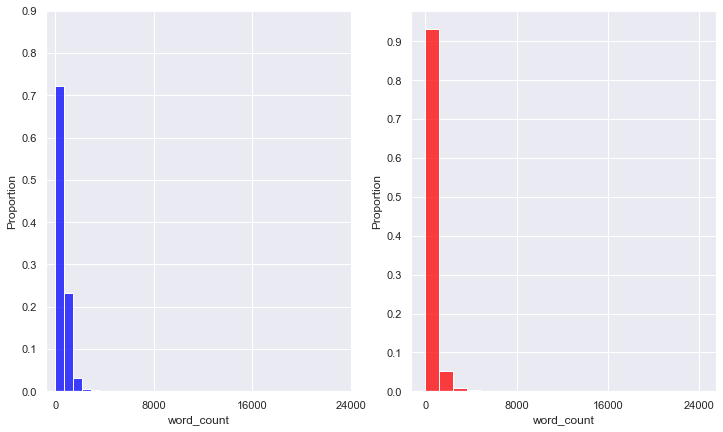

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

p1 = sns.histplot(x=Fake_News_Data[Fake_News_Data['fake']==0]['word_count'], stat="proportion", bins=20, color="blue", ax=axs[0] )
p1.set_xticks( range(int(Fake_News_Data['word_count'].min()) , int(Fake_News_Data['word_count'].max() ) , 8000) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.histplot(x=Fake_News_Data[Fake_News_Data['fake']==1]['word_count'], stat="proportion", bins=20, color="red" , ax=axs[1])
p2.set_xticks( range(int(Fake_News_Data['word_count'].min()) , int(Fake_News_Data['word_count'].max() ) , 8000) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
CountVect = CountVectorizer()
X_train_counts = CountVect.fit_transform(Fake_News_Data['text'])

ValueError: np.nan is an invalid document, expected byte or unicode string.